In [37]:
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transform
from matplotlib import pyplot
import numpy as np
import cv2
import scipy.io as sci
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling2D, Conv2D, MaxPool1D, Dropout
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [38]:
(train_images,train_labels),(test_images,test_labels) = datasets.cifar10.load_data()

In [39]:
test_images.shape

(10000, 32, 32, 3)

In [40]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [41]:
model=Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

In [42]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_15 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_16 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 64)       

In [43]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=15,batch_size=64, 
                    validation_data=(test_images, test_labels))

Epoch 1/15
782/782 [==============================] - 287s 361ms/step - loss: 1.8821 - accuracy: 0.3615 - val_loss: 1.1748 - val_accuracy: 0.5801
Epoch 2/15
782/782 [==============================] - 296s 379ms/step - loss: 1.1559 - accuracy: 0.5865 - val_loss: 0.9376 - val_accuracy: 0.6676
Epoch 3/15
782/782 [==============================] - 305s 391ms/step - loss: 0.9322 - accuracy: 0.6730 - val_loss: 0.8643 - val_accuracy: 0.6967
Epoch 4/15
782/782 [==============================] - 308s 394ms/step - loss: 0.7962 - accuracy: 0.7227 - val_loss: 0.7021 - val_accuracy: 0.7563
Epoch 5/15
782/782 [==============================] - 304s 389ms/step - loss: 0.7265 - accuracy: 0.7486 - val_loss: 0.6968 - val_accuracy: 0.7615
Epoch 6/15
782/782 [==============================] - 306s 391ms/step - loss: 0.6658 - accuracy: 0.7678 - val_loss: 0.6625 - val_accuracy: 0.7743
Epoch 7/15
782/782 [==============================] - 306s 391ms/step - loss: 0.6073 - accuracy: 0.7879 - val_loss: 0.6190 -

In [44]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)

313/313 [==============================] - 14s 44ms/step - loss: 0.4798 - accuracy: 0.8383


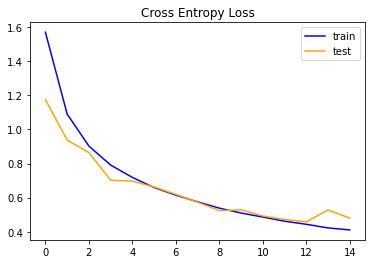

<Figure size 720x720 with 0 Axes>

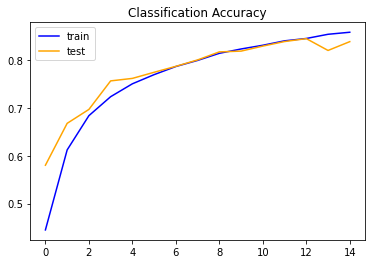

<Figure size 720x720 with 0 Axes>

In [45]:
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
pyplot.legend()
g = plt.figure()
g.set_figwidth(10)
g.set_figheight(10)
pyplot.show()
# plot accuracy
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
pyplot.legend()
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
# save plot to file
pyplot.show()
pyplot.close()